<a href="https://colab.research.google.com/github/YolandaNkalashe25/COS801/blob/main/COS801_FV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COS 801 Assignment Code

# Section 1. Installing packages to be used

In [1]:
!pip3 install torch torchvision
!pip install keras
!pip install tensorflow
!pip install mnist


In [2]:
import torch
from torch import nn, optim
import torch.nn.functional as F

import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
import seaborn as sns
from matplotlib import pyplot

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models

In [5]:
import keras
from keras import layers
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.datasets import cifar100
from keras.datasets import fashion_mnist
from keras.datasets import mnist

# Section 2: Importing Datasets

**MNIST Fashion**

In [6]:
(MF_train_images, MF_train_labels), (MF_test_images, MF_test_labels) = datasets.fashion_mnist.load_data()

In [7]:
#Normalizing the data
MF_train_images, MF_test_images = MF_train_images / 255.0, MF_test_images / 255.0

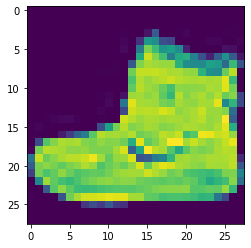

In [8]:
#visual
pyplot.imshow(MF_train_images[0].reshape((28,28)))

In [9]:
MF_train_images.shape

(60000, 28, 28)

In [10]:
MF_train_labels.shape

(60000,)

In [11]:
MF_test_images.shape

(10000, 28, 28)

In [12]:
MF_test_labels.shape

(10000,)

In [13]:
#Reshaping the data
MF_train_images_shaped=MF_train_images.reshape(60000,28*28)
MF_test_images_shaped = MF_test_images.reshape(10000,28*28)

In [14]:
MF_train_images_shaped.shape

(60000, 784)

In [15]:
MF_test_images_shaped.shape

(10000, 784)

In [16]:
MF_train_labels=to_categorical(MF_train_labels)

**MNIST Handwritten Data**

In [17]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = datasets.mnist.load_data()

In [18]:
mnist_train_images, mnist_test_images = mnist_train_images / 255.0, mnist_test_images / 255.0

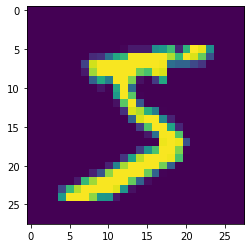

In [19]:
#visual
pyplot.imshow(mnist_train_images[0].reshape((28,28)))

In [20]:
mnist_train_images.shape

(60000, 28, 28)

In [21]:
mnist_train_labels.shape

(60000,)

In [22]:
mnist_test_labels.shape

(10000,)

In [23]:
mnist_test_images.shape

(10000, 28, 28)

In [24]:
#Reshaping the data
mnist_train_images_shape=mnist_train_images.reshape(60000,28*28)
mnist_test_images_shape = mnist_test_images.reshape(10000,28*28)

In [25]:
mnist_train_labels=to_categorical(mnist_train_labels)

**CIFAR10 Dataset**

In [26]:
(CF10_train_images, CF10_train_labels), (CF10_test_images, CF10_test_labels) = datasets.cifar10.load_data()

In [27]:
CF10_train_images, CF10_test_images = CF10_train_images / 255.0, CF10_test_images / 255.0

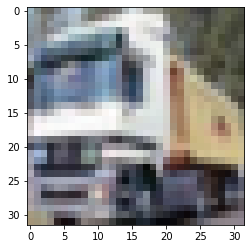

In [28]:
pyplot.imshow(CF10_train_images[1], cmap=pyplot.cm.binary)

In [29]:
CF10_train_images.shape

(50000, 32, 32, 3)

In [30]:
CF10_train_labels.shape

(50000, 1)

In [31]:
CF10_test_images.shape

(10000, 32, 32, 3)

In [32]:
CF10_test_labels.shape

(10000, 1)

In [33]:
CF10_train_images_shape=CF10_train_images.reshape(50000,32*32*3)
CF10_test_images_shape = CF10_test_images.reshape(10000,32*32*3)

In [34]:
CF10_train_labels=to_categorical(CF10_train_labels)

**CIFAR100 Dataset**

In [35]:
(CF100_train_images, CF100_train_labels), (CF100_test_images, CF100_test_labels) = datasets.cifar100.load_data()

In [36]:
CF100_train_images, CF100_test_images = CF100_train_images / 255.0, CF100_test_images / 255.0

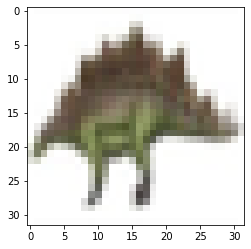

In [37]:
pyplot.imshow(CF100_train_images[1], cmap=pyplot.cm.binary)

In [38]:
CF100_train_images.shape

(50000, 32, 32, 3)

In [39]:
CF100_train_labels.shape

(50000, 1)

In [40]:
CF100_test_images.shape

(10000, 32, 32, 3)

In [41]:
CF100_test_labels.shape

(10000, 1)

In [42]:
CF100_train_images_shape=CF100_train_images.reshape(50000,32*32*3)
CF100_test_images_shape = CF100_test_images.reshape(10000,32*32*3)

In [43]:
CF100_train_images.shape

(50000, 32, 32, 3)

In [44]:
CF100_train_labels=to_categorical(CF100_train_labels)

# Section 3: Building the models

## Model 1: Simple NN (No hidden Layers)

In [34]:
def simpleNN(ndim,out):
  model=Sequential()
  model.add(Dense(out, activation='softmax',kernel_initializer='he_uniform',input_dim=ndim))

  #compiling the model:
  opt = SGD()
  model.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )

  return model


In [35]:
simple_model_mnist=simpleNN(ndim=784,out=10)
simple_model_cifar=simpleNN(ndim=3072,out=10)

In [44]:
#Plotting function:

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
  train_metrics=history.history[metric]
  val_metrics=history.history['val_'+metric]
  ephocs= range(1, len(train_metrics)+1)
  pyplot.plot(ephocs, train_metrics)
  pyplot.plot(ephocs, val_metrics)
  pyplot.title('Training and Validation'+ metric)
  pyplot.xlabel("Ephocs")
  pyplot.ylabel(metric)
  pyplot.legend(["train_"+metric, 'val_'+metric])
  pyplot.show()


In [45]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',patience=10)

### **Training model on MNIST FASHION**

In [ ]:
#Training model without early stopping:

history_MF= simple_model_mnist.fit(MF_train_images_shaped,MF_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500)

In [ ]:
#Training model to include early stopping with patience of 10

history_MF_es= simple_model_mnist.fit(MF_train_images_shaped,MF_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500,callbacks=[early_stopping])

In [ ]:
plot_metric(history_MF,'loss')

In [ ]:
plot_metric(history_MF_es,'loss')

In [ ]:
plot_metric(history_MF,'accuracy')

In [ ]:
plot_metric(history_MF_es,'accuracy')

In [ ]:
#Evaluating the model.

_, MF_train_acc = simple_model_mnist.evaluate(MF_train_images_shaped, MF_train_labels, verbose=0)
_, MF_test_acc = simple_model_mnist.evaluate(MF_test_images_shaped, to_categorical(MF_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (MF_train_acc, MF_test_acc))

In [ ]:
#Using the model to predict:
predictions = simple_model_mnist.predict(MF_test_images_shaped)

In [ ]:
pred_val_array=predictions[0]

In [ ]:
np.argmax(pred_val_array)

In [ ]:
MF_test_labels[0]

In [ ]:
MF_test_labels.shape

In [ ]:
correct="No"
count=0
for i in range(10000):
  pred_val_array=predictions[i]
  Ypred=np.argmax(pred_val_array)
  Y=MF_test_labels[i]

  if Ypred!=Y:
    count +=1

  #if Ypred==Y:
    #correct="Yes"

  #print("Ypred= ",Ypred, "Ytrue= ",Y, "Correctly Classified: ", correct)

In [ ]:
missclassified_predictions=(count/10000)*100
missclassified_predictions

### **Training model on MNIST Digits**

In [80]:
history_mnist= simple_model_mnist.fit(mnist_train_images_shape,mnist_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500)

Epoch 1/500
960/960 - 1s - loss: 2.8587 - accuracy: 0.3848 - val_loss: 1.2288 - val_accuracy: 0.6432
Epoch 2/500
960/960 - 1s - loss: 0.9499 - accuracy: 0.7125 - val_loss: 0.7205 - val_accuracy: 0.7803
Epoch 3/500
960/960 - 1s - loss: 0.6765 - accuracy: 0.7930 - val_loss: 0.5753 - val_accuracy: 0.8276
Epoch 4/500
960/960 - 1s - loss: 0.5734 - accuracy: 0.8251 - val_loss: 0.5072 - val_accuracy: 0.8487
Epoch 5/500
960/960 - 1s - loss: 0.5174 - accuracy: 0.8440 - val_loss: 0.4660 - val_accuracy: 0.8622
Epoch 6/500
960/960 - 1s - loss: 0.4811 - accuracy: 0.8561 - val_loss: 0.4385 - val_accuracy: 0.8723
Epoch 7/500
960/960 - 1s - loss: 0.4555 - accuracy: 0.8648 - val_loss: 0.4182 - val_accuracy: 0.8790
Epoch 8/500
960/960 - 1s - loss: 0.4362 - accuracy: 0.8717 - val_loss: 0.4035 - val_accuracy: 0.8845
Epoch 9/500
960/960 - 1s - loss: 0.4212 - accuracy: 0.8766 - val_loss: 0.3911 - val_accuracy: 0.8891
Epoch 10/500
960/960 - 1s - loss: 0.4088 - accuracy: 0.8805 - val_loss: 0.3812 - val_accura

In [81]:
history_mnist_es= simple_model_mnist.fit(mnist_train_images_shape,mnist_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500,callbacks=[early_stopping])

Epoch 1/500
960/960 - 1s - loss: 0.2430 - accuracy: 0.9324 - val_loss: 0.2684 - val_accuracy: 0.9275
Epoch 2/500
960/960 - 1s - loss: 0.2430 - accuracy: 0.9323 - val_loss: 0.2680 - val_accuracy: 0.9282
Epoch 3/500
960/960 - 1s - loss: 0.2429 - accuracy: 0.9326 - val_loss: 0.2683 - val_accuracy: 0.9282
Epoch 4/500
960/960 - 1s - loss: 0.2429 - accuracy: 0.9327 - val_loss: 0.2683 - val_accuracy: 0.9276
Epoch 5/500
960/960 - 1s - loss: 0.2429 - accuracy: 0.9327 - val_loss: 0.2682 - val_accuracy: 0.9282
Epoch 6/500
960/960 - 1s - loss: 0.2428 - accuracy: 0.9326 - val_loss: 0.2686 - val_accuracy: 0.9277
Epoch 7/500
960/960 - 1s - loss: 0.2428 - accuracy: 0.9329 - val_loss: 0.2683 - val_accuracy: 0.9285
Epoch 8/500
960/960 - 1s - loss: 0.2428 - accuracy: 0.9327 - val_loss: 0.2681 - val_accuracy: 0.9285
Epoch 9/500
960/960 - 1s - loss: 0.2428 - accuracy: 0.9327 - val_loss: 0.2682 - val_accuracy: 0.9283
Epoch 10/500
960/960 - 1s - loss: 0.2427 - accuracy: 0.9326 - val_loss: 0.2682 - val_accura

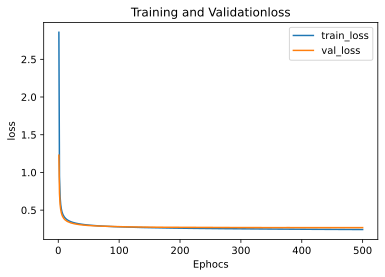

In [82]:
plot_metric(history_mnist,'loss')

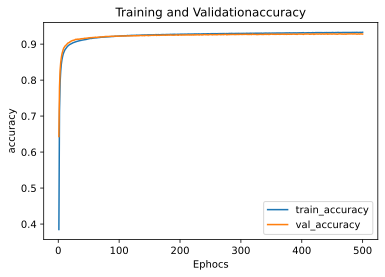

In [83]:
plot_metric(history_mnist,'accuracy')

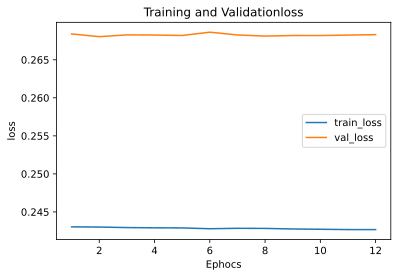

In [84]:
plot_metric(history_mnist_es,'loss')

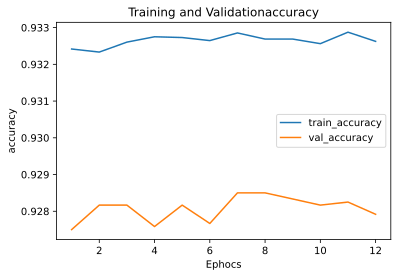

In [85]:
plot_metric(history_mnist_es,'accuracy')

In [86]:
_, mnist_train_acc = simple_model_mnist.evaluate(mnist_train_images_shape, mnist_train_labels, verbose=0)
_, mnist_test_acc = simple_model_mnist.evaluate(mnist_test_images_shape, to_categorical(mnist_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (mnist_train_acc, mnist_test_acc))

Train: 0.932, Test: 0.926


### **Training Model with CIFAR10 Dataset**

In [89]:
history_CF10= simple_model_cifar.fit(CF10_train_images_shape,to_categorical(CF10_train_labels),validation_split=0.20,batch_size=50,verbose=2,epochs=500)

Epoch 1/500
800/800 - 2s - loss: 1.9750 - accuracy: 0.2921 - val_loss: 1.8776 - val_accuracy: 0.3394
Epoch 2/500
800/800 - 2s - loss: 1.8510 - accuracy: 0.3482 - val_loss: 1.8568 - val_accuracy: 0.3423
Epoch 3/500
800/800 - 2s - loss: 1.8168 - accuracy: 0.3611 - val_loss: 1.8158 - val_accuracy: 0.3687
Epoch 4/500
800/800 - 2s - loss: 1.7971 - accuracy: 0.3737 - val_loss: 1.8058 - val_accuracy: 0.3722
Epoch 5/500
800/800 - 2s - loss: 1.7803 - accuracy: 0.3806 - val_loss: 1.8097 - val_accuracy: 0.3677
Epoch 6/500
800/800 - 2s - loss: 1.7719 - accuracy: 0.3837 - val_loss: 1.8195 - val_accuracy: 0.3654
Epoch 7/500
800/800 - 2s - loss: 1.7625 - accuracy: 0.3888 - val_loss: 1.7886 - val_accuracy: 0.3781
Epoch 8/500
800/800 - 2s - loss: 1.7525 - accuracy: 0.3915 - val_loss: 1.8300 - val_accuracy: 0.3558
Epoch 9/500
800/800 - 2s - loss: 1.7477 - accuracy: 0.3923 - val_loss: 1.8435 - val_accuracy: 0.3511
Epoch 10/500
800/800 - 2s - loss: 1.7410 - accuracy: 0.3958 - val_loss: 1.7954 - val_accura

In [90]:
history_CF_es= simple_model_cifar.fit(CF10_train_images_shape,to_categorical(CF10_train_labels),validation_split=0.20,batch_size=50,verbose=2,epochs=500,callbacks=[early_stopping])

Epoch 1/500
800/800 - 2s - loss: 1.5691 - accuracy: 0.4622 - val_loss: 1.8231 - val_accuracy: 0.3818
Epoch 2/500
800/800 - 2s - loss: 1.5643 - accuracy: 0.4652 - val_loss: 1.8448 - val_accuracy: 0.3777
Epoch 3/500
800/800 - 2s - loss: 1.5691 - accuracy: 0.4656 - val_loss: 1.8265 - val_accuracy: 0.3829
Epoch 4/500
800/800 - 2s - loss: 1.5668 - accuracy: 0.4651 - val_loss: 1.8175 - val_accuracy: 0.3836
Epoch 5/500
800/800 - 2s - loss: 1.5669 - accuracy: 0.4653 - val_loss: 1.8108 - val_accuracy: 0.3855
Epoch 6/500
800/800 - 2s - loss: 1.5656 - accuracy: 0.4642 - val_loss: 1.8378 - val_accuracy: 0.3765
Epoch 7/500
800/800 - 2s - loss: 1.5646 - accuracy: 0.4645 - val_loss: 1.8192 - val_accuracy: 0.3847
Epoch 8/500
800/800 - 2s - loss: 1.5671 - accuracy: 0.4645 - val_loss: 1.8590 - val_accuracy: 0.3710
Epoch 9/500
800/800 - 2s - loss: 1.5650 - accuracy: 0.4646 - val_loss: 1.8203 - val_accuracy: 0.3852
Epoch 10/500
800/800 - 2s - loss: 1.5655 - accuracy: 0.4649 - val_loss: 1.8585 - val_accura

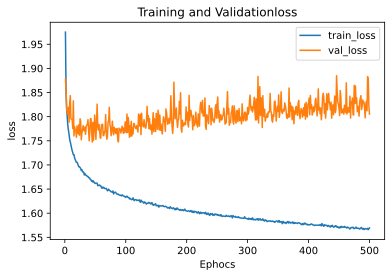

In [91]:
plot_metric(history_CF10,'loss')

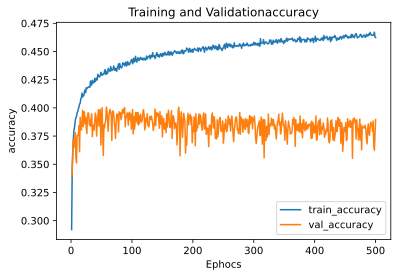

In [92]:
plot_metric(history_CF10,'accuracy')

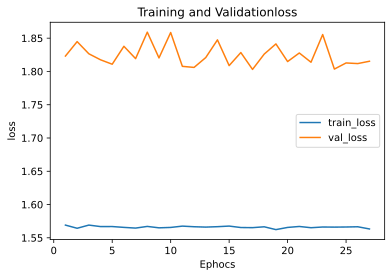

In [93]:
plot_metric(history_CF_es,'loss')

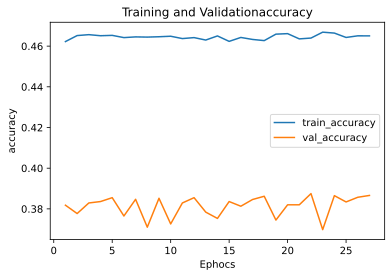

In [94]:
plot_metric(history_CF_es,'accuracy')

In [95]:
_, CF10_train_acc = simple_model_cifar.evaluate(CF10_train_images_shape, to_categorical(CF10_train_labels), verbose=0)
_, CF10_test_acc = simple_model_cifar.evaluate(CF10_test_images_shape, to_categorical(CF10_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF10_train_acc, CF10_test_acc))

Train: 0.460, Test: 0.386


### Training Model on CIFAR100 data

In [39]:
history_CF100= simpleNN(ndim=3072,out=100).fit(CF100_train_images_shape,CF100_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500)

Epoch 1/500
800/800 - 3s - loss: 4.3253 - accuracy: 0.0548 - val_loss: 4.1231 - val_accuracy: 0.0875
Epoch 2/500
800/800 - 3s - loss: 4.0355 - accuracy: 0.1015 - val_loss: 3.9845 - val_accuracy: 0.1102
Epoch 3/500
800/800 - 3s - loss: 3.9221 - accuracy: 0.1222 - val_loss: 3.9168 - val_accuracy: 0.1287
Epoch 4/500
800/800 - 3s - loss: 3.8516 - accuracy: 0.1356 - val_loss: 3.8608 - val_accuracy: 0.1308
Epoch 5/500
800/800 - 3s - loss: 3.8003 - accuracy: 0.1445 - val_loss: 3.8504 - val_accuracy: 0.1292
Epoch 6/500
800/800 - 3s - loss: 3.7616 - accuracy: 0.1542 - val_loss: 3.8279 - val_accuracy: 0.1394
Epoch 7/500
800/800 - 3s - loss: 3.7304 - accuracy: 0.1605 - val_loss: 3.8058 - val_accuracy: 0.1422
Epoch 8/500
800/800 - 3s - loss: 3.7045 - accuracy: 0.1650 - val_loss: 3.7858 - val_accuracy: 0.1484
Epoch 9/500
800/800 - 3s - loss: 3.6814 - accuracy: 0.1700 - val_loss: 3.7858 - val_accuracy: 0.1458
Epoch 10/500
800/800 - 3s - loss: 3.6610 - accuracy: 0.1729 - val_loss: 3.7641 - val_accura

In [46]:
history_CF100_es= simpleNN(ndim=3072,out=100).fit(CF100_train_images_shape,CF100_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500,callbacks=[early_stopping])

Epoch 1/500
800/800 - 4s - loss: 4.3334 - accuracy: 0.0563 - val_loss: 4.1463 - val_accuracy: 0.0837
Epoch 2/500
800/800 - 3s - loss: 4.0376 - accuracy: 0.1016 - val_loss: 3.9870 - val_accuracy: 0.1134
Epoch 3/500
800/800 - 3s - loss: 3.9216 - accuracy: 0.1223 - val_loss: 3.9122 - val_accuracy: 0.1260
Epoch 4/500
800/800 - 3s - loss: 3.8513 - accuracy: 0.1365 - val_loss: 3.8748 - val_accuracy: 0.1345
Epoch 5/500
800/800 - 3s - loss: 3.8009 - accuracy: 0.1466 - val_loss: 3.8398 - val_accuracy: 0.1422
Epoch 6/500
800/800 - 3s - loss: 3.7613 - accuracy: 0.1549 - val_loss: 3.8158 - val_accuracy: 0.1461
Epoch 7/500
800/800 - 3s - loss: 3.7306 - accuracy: 0.1603 - val_loss: 3.7961 - val_accuracy: 0.1528
Epoch 8/500
800/800 - 3s - loss: 3.7043 - accuracy: 0.1662 - val_loss: 3.7774 - val_accuracy: 0.1560
Epoch 9/500
800/800 - 3s - loss: 3.6814 - accuracy: 0.1719 - val_loss: 3.7738 - val_accuracy: 0.1476
Epoch 10/500
800/800 - 3s - loss: 3.6607 - accuracy: 0.1735 - val_loss: 3.7625 - val_accura

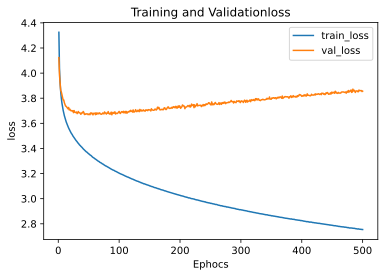

In [47]:
plot_metric(history_CF100,'loss')

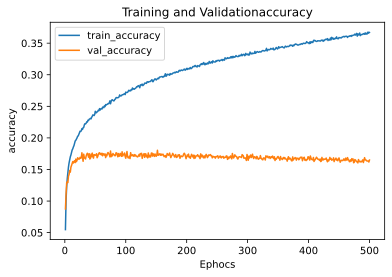

In [48]:
plot_metric(history_CF100,'accuracy')

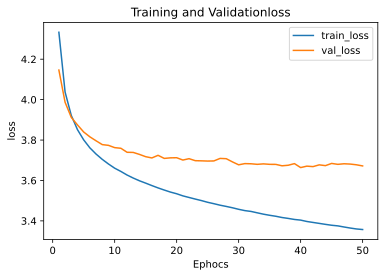

In [49]:
plot_metric(history_CF100_es,'loss')

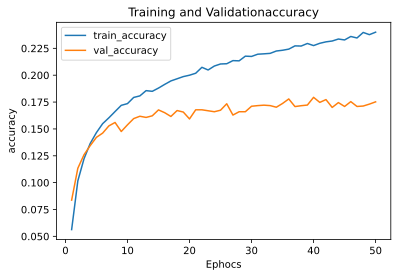

In [50]:
plot_metric(history_CF100_es,'accuracy')

In [52]:
_, CF100_train_acc = simpleNN(ndim=3072,out=100).evaluate(CF100_train_images_shape, CF100_train_labels, verbose=0)
_, CF100_test_acc = simpleNN(ndim=3072,out=100).evaluate(CF100_test_images_shape, to_categorical(CF100_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF100_train_acc, CF100_test_acc))

Train: 0.011, Test: 0.007


## Model2 : MLP

In [124]:
def model2_MLP(ndim,out):

  model = Sequential()
  model.add(Dense(200, activation='relu',kernel_initializer='he_uniform',input_dim=ndim))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(25, activation='relu'))
  model.add(Dense(out, activation='softmax'))
  
  opt = SGD()
  model.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )

  return model


### Training Model on MNIST Fashion

In [105]:
#Training without ES

history_MF_model2=model2_MLP(ndim=784,out=10).fit(MF_train_images_shaped,MF_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500)

Epoch 1/500
960/960 - 3s - loss: 0.9199 - accuracy: 0.6974 - val_loss: 0.5768 - val_accuracy: 0.7966
Epoch 2/500
960/960 - 3s - loss: 0.5288 - accuracy: 0.8152 - val_loss: 0.4950 - val_accuracy: 0.8275
Epoch 3/500
960/960 - 3s - loss: 0.4693 - accuracy: 0.8355 - val_loss: 0.4502 - val_accuracy: 0.8447
Epoch 4/500
960/960 - 3s - loss: 0.4354 - accuracy: 0.8457 - val_loss: 0.4363 - val_accuracy: 0.8448
Epoch 5/500
960/960 - 3s - loss: 0.4112 - accuracy: 0.8544 - val_loss: 0.4180 - val_accuracy: 0.8541
Epoch 6/500
960/960 - 3s - loss: 0.3930 - accuracy: 0.8603 - val_loss: 0.4014 - val_accuracy: 0.8585
Epoch 7/500
960/960 - 3s - loss: 0.3772 - accuracy: 0.8669 - val_loss: 0.4002 - val_accuracy: 0.8579
Epoch 8/500
960/960 - 2s - loss: 0.3642 - accuracy: 0.8704 - val_loss: 0.3829 - val_accuracy: 0.8632
Epoch 9/500
960/960 - 3s - loss: 0.3547 - accuracy: 0.8732 - val_loss: 0.3691 - val_accuracy: 0.8658
Epoch 10/500
960/960 - 3s - loss: 0.3448 - accuracy: 0.8762 - val_loss: 0.3713 - val_accura

In [106]:
#With Early Stopping

history_MF_model2_es=model2_MLP(ndim=784,out=10).fit(MF_train_images_shaped,MF_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500, callbacks=[early_stopping])

Epoch 1/500
960/960 - 3s - loss: 0.9145 - accuracy: 0.6960 - val_loss: 0.6453 - val_accuracy: 0.7795
Epoch 2/500
960/960 - 3s - loss: 0.5488 - accuracy: 0.8109 - val_loss: 0.5117 - val_accuracy: 0.8220
Epoch 3/500
960/960 - 3s - loss: 0.4845 - accuracy: 0.8306 - val_loss: 0.5101 - val_accuracy: 0.8187
Epoch 4/500
960/960 - 3s - loss: 0.4473 - accuracy: 0.8427 - val_loss: 0.4361 - val_accuracy: 0.8478
Epoch 5/500
960/960 - 3s - loss: 0.4221 - accuracy: 0.8514 - val_loss: 0.4311 - val_accuracy: 0.8498
Epoch 6/500
960/960 - 3s - loss: 0.4034 - accuracy: 0.8568 - val_loss: 0.4000 - val_accuracy: 0.8596
Epoch 7/500
960/960 - 3s - loss: 0.3840 - accuracy: 0.8644 - val_loss: 0.3854 - val_accuracy: 0.8647
Epoch 8/500
960/960 - 3s - loss: 0.3739 - accuracy: 0.8666 - val_loss: 0.3808 - val_accuracy: 0.8656
Epoch 9/500
960/960 - 3s - loss: 0.3604 - accuracy: 0.8707 - val_loss: 0.3835 - val_accuracy: 0.8635
Epoch 10/500
960/960 - 3s - loss: 0.3515 - accuracy: 0.8736 - val_loss: 0.3815 - val_accura

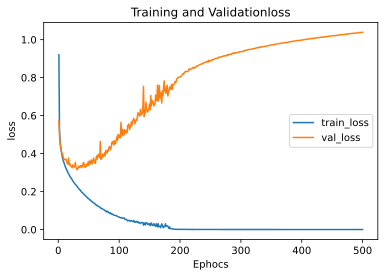

In [107]:
plot_metric(history_MF_model2,'loss')

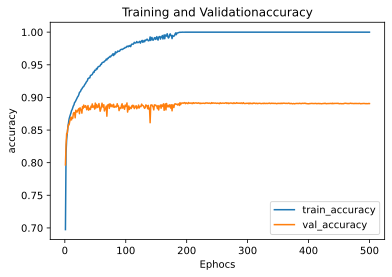

In [108]:
plot_metric(history_MF_model2,'accuracy')

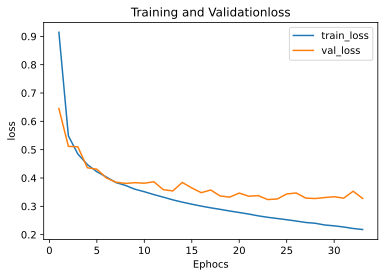

In [109]:
plot_metric(history_MF_model2_es,'loss')

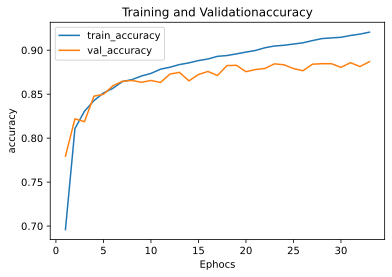

In [110]:
plot_metric(history_MF_model2_es,'accuracy')

In [111]:
#Evaluating model
_, MF_train_acc_model2 = model2_MLP(ndim=784,out=10).evaluate(MF_train_images_shaped, MF_train_labels, verbose=0)
_, MF_test_acc_model2 = model2_MLP(ndim=784,out=10).evaluate(MF_test_images_shaped, to_categorical(MF_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (MF_train_acc_model2, MF_test_acc_model2))

Train: 0.121, Test: 0.100


### Training Model on MNIST Handwriting

In [113]:
#Training without ES

history_mnist_model2=model2_MLP(ndim=784,out=10).fit(mnist_train_images_shape,mnist_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500)

Epoch 1/500
960/960 - 3s - loss: 1.0335 - accuracy: 0.6873 - val_loss: 0.4248 - val_accuracy: 0.8745
Epoch 2/500
960/960 - 2s - loss: 0.3691 - accuracy: 0.8913 - val_loss: 0.2798 - val_accuracy: 0.9190
Epoch 3/500
960/960 - 2s - loss: 0.2724 - accuracy: 0.9204 - val_loss: 0.2268 - val_accuracy: 0.9352
Epoch 4/500
960/960 - 2s - loss: 0.2220 - accuracy: 0.9353 - val_loss: 0.1928 - val_accuracy: 0.9442
Epoch 5/500
960/960 - 2s - loss: 0.1872 - accuracy: 0.9458 - val_loss: 0.1770 - val_accuracy: 0.9484
Epoch 6/500
960/960 - 2s - loss: 0.1636 - accuracy: 0.9518 - val_loss: 0.1579 - val_accuracy: 0.9539
Epoch 7/500
960/960 - 3s - loss: 0.1440 - accuracy: 0.9579 - val_loss: 0.1487 - val_accuracy: 0.9569
Epoch 8/500
960/960 - 2s - loss: 0.1294 - accuracy: 0.9620 - val_loss: 0.1353 - val_accuracy: 0.9607
Epoch 9/500
960/960 - 3s - loss: 0.1166 - accuracy: 0.9660 - val_loss: 0.1308 - val_accuracy: 0.9611
Epoch 10/500
960/960 - 2s - loss: 0.1064 - accuracy: 0.9690 - val_loss: 0.1278 - val_accura

In [134]:
#With Early Stopping

history_mnist_model2_es=model2_MLP(ndim=784,out=10).fit(mnist_train_images_shape,mnist_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500, callbacks=[early_stopping])

Epoch 1/500
960/960 - 3s - loss: 1.1265 - accuracy: 0.6479 - val_loss: 0.4740 - val_accuracy: 0.8570
Epoch 2/500
960/960 - 3s - loss: 0.3751 - accuracy: 0.8907 - val_loss: 0.3013 - val_accuracy: 0.9107
Epoch 3/500
960/960 - 3s - loss: 0.2840 - accuracy: 0.9174 - val_loss: 0.2552 - val_accuracy: 0.9258
Epoch 4/500
960/960 - 3s - loss: 0.2340 - accuracy: 0.9324 - val_loss: 0.2066 - val_accuracy: 0.9408
Epoch 5/500
960/960 - 3s - loss: 0.1994 - accuracy: 0.9422 - val_loss: 0.1878 - val_accuracy: 0.9450
Epoch 6/500
960/960 - 3s - loss: 0.1736 - accuracy: 0.9488 - val_loss: 0.1664 - val_accuracy: 0.9536
Epoch 7/500
960/960 - 2s - loss: 0.1551 - accuracy: 0.9537 - val_loss: 0.1562 - val_accuracy: 0.9558
Epoch 8/500
960/960 - 2s - loss: 0.1393 - accuracy: 0.9588 - val_loss: 0.1585 - val_accuracy: 0.9553
Epoch 9/500
960/960 - 2s - loss: 0.1271 - accuracy: 0.9622 - val_loss: 0.1513 - val_accuracy: 0.9580
Epoch 10/500
960/960 - 3s - loss: 0.1151 - accuracy: 0.9659 - val_loss: 0.1313 - val_accura

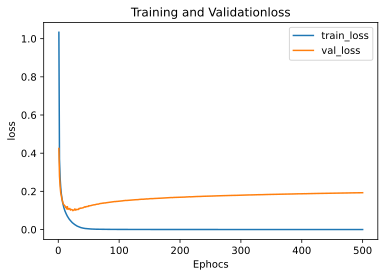

In [135]:
plot_metric(history_mnist_model2,'loss')

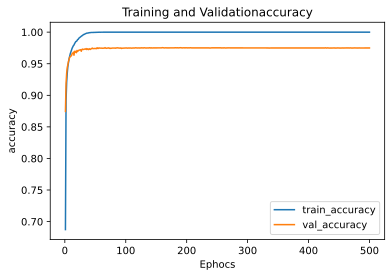

In [116]:
plot_metric(history_mnist_model2,'accuracy')

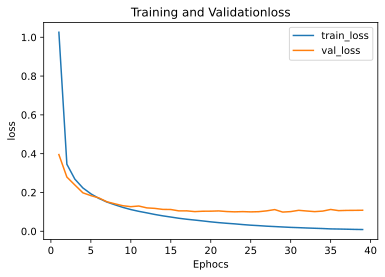

In [117]:
plot_metric(history_mnist_model2_es,'loss')

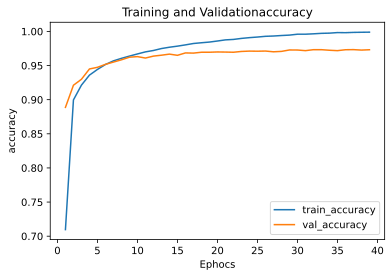

In [118]:
plot_metric(history_mnist_model2_es,'accuracy')

In [137]:
#Evaluating model
_, mnist_train_acc_model2 = history_mnist_model2_es.model.evaluate(mnist_train_images_shape, mnist_train_labels, verbose=0)
_, mnist_test_acc_model2 = history_mnist_model2_es.model.evaluate(mnist_test_images_shape, to_categorical(mnist_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (mnist_train_acc_model2, mnist_test_acc_model2))

Train: 0.993, Test: 0.974


In [133]:
missclassified_predictions=(count/10000)*100
missclassified_predictions

89.14999999999999

### Training model on CIFAR10

In [139]:
#Training without ES

history_CF10_model2=model2_MLP(ndim=3072,out=10).fit(CF10_train_images_shape,CF10_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=1500)

Epoch 1/1500
800/800 - 5s - loss: 2.0059 - accuracy: 0.2712 - val_loss: 1.8626 - val_accuracy: 0.3326
Epoch 2/1500
800/800 - 5s - loss: 1.7971 - accuracy: 0.3567 - val_loss: 1.7664 - val_accuracy: 0.3682
Epoch 3/1500
800/800 - 5s - loss: 1.7173 - accuracy: 0.3871 - val_loss: 1.7105 - val_accuracy: 0.3914
Epoch 4/1500
800/800 - 5s - loss: 1.6631 - accuracy: 0.4065 - val_loss: 1.6414 - val_accuracy: 0.4152
Epoch 5/1500
800/800 - 5s - loss: 1.6159 - accuracy: 0.4275 - val_loss: 1.6292 - val_accuracy: 0.4233
Epoch 6/1500
800/800 - 5s - loss: 1.5798 - accuracy: 0.4378 - val_loss: 1.6108 - val_accuracy: 0.4289
Epoch 7/1500
800/800 - 5s - loss: 1.5475 - accuracy: 0.4489 - val_loss: 1.6339 - val_accuracy: 0.4190
Epoch 8/1500
800/800 - 5s - loss: 1.5181 - accuracy: 0.4582 - val_loss: 1.5559 - val_accuracy: 0.4470
Epoch 9/1500
800/800 - 5s - loss: 1.4890 - accuracy: 0.4701 - val_loss: 1.5401 - val_accuracy: 0.4539
Epoch 10/1500
800/800 - 5s - loss: 1.4687 - accuracy: 0.4745 - val_loss: 1.5056 - 

In [140]:
#With Early Stopping

history_CF10_model2_es=model2_MLP(ndim=3072,out=10).fit(CF10_train_images_shape,CF10_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=1500, callbacks=[early_stopping])

Epoch 1/1500
800/800 - 6s - loss: 2.0369 - accuracy: 0.2530 - val_loss: 1.8955 - val_accuracy: 0.3100
Epoch 2/1500
800/800 - 5s - loss: 1.8279 - accuracy: 0.3438 - val_loss: 1.8658 - val_accuracy: 0.3320
Epoch 3/1500
800/800 - 5s - loss: 1.7367 - accuracy: 0.3755 - val_loss: 1.7371 - val_accuracy: 0.3751
Epoch 4/1500
800/800 - 5s - loss: 1.6734 - accuracy: 0.4002 - val_loss: 1.6910 - val_accuracy: 0.3915
Epoch 5/1500
800/800 - 5s - loss: 1.6280 - accuracy: 0.4187 - val_loss: 1.6760 - val_accuracy: 0.4045
Epoch 6/1500
800/800 - 5s - loss: 1.5903 - accuracy: 0.4317 - val_loss: 1.6407 - val_accuracy: 0.4177
Epoch 7/1500
800/800 - 5s - loss: 1.5553 - accuracy: 0.4434 - val_loss: 1.6333 - val_accuracy: 0.4252
Epoch 8/1500
800/800 - 5s - loss: 1.5313 - accuracy: 0.4547 - val_loss: 1.5551 - val_accuracy: 0.4515
Epoch 9/1500
800/800 - 5s - loss: 1.5010 - accuracy: 0.4645 - val_loss: 1.5608 - val_accuracy: 0.4446
Epoch 10/1500
800/800 - 5s - loss: 1.4788 - accuracy: 0.4728 - val_loss: 1.5457 - 

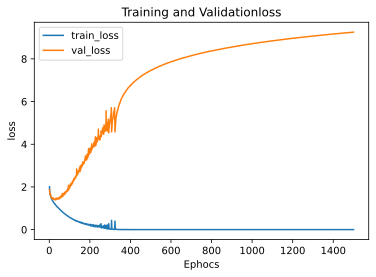

In [141]:
plot_metric(history_CF10_model2,'loss')

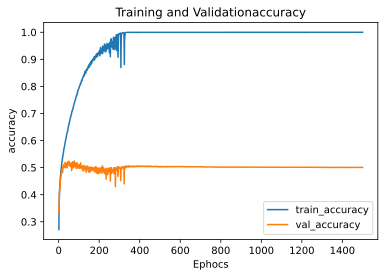

In [142]:
plot_metric(history_CF10_model2,'accuracy')

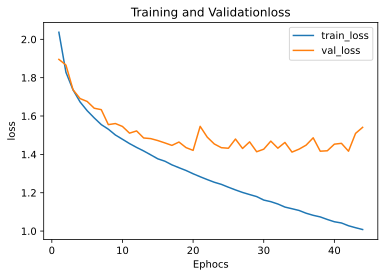

In [143]:
plot_metric(history_CF10_model2_es,'loss')

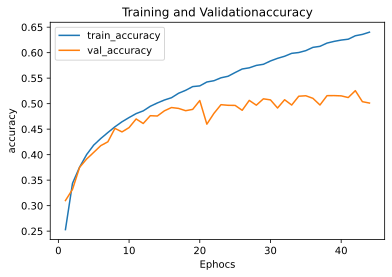

In [144]:
plot_metric(history_CF10_model2_es,'accuracy')

In [145]:
#Evaluating model
_, CF10_train_acc_model2 = history_CF10_model2_es.model.evaluate(CF10_train_images_shape, CF10_train_labels, verbose=0)
_, CF10_test_acc_model2 = history_CF10_model2_es.model.evaluate(CF10_test_images_shape, to_categorical(CF10_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF10_train_acc_model2, CF10_test_acc_model2))

Train: 0.602, Test: 0.501


### Train model on CF100 data

In [146]:
#Training without ES

history_CF100_model2=model2_MLP(ndim=3072,out=100).fit(CF100_train_images_shape,CF100_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=1500)

Epoch 1/1500
800/800 - 5s - loss: 4.5867 - accuracy: 0.0132 - val_loss: 4.5645 - val_accuracy: 0.0158
Epoch 2/1500
800/800 - 5s - loss: 4.5226 - accuracy: 0.0283 - val_loss: 4.4738 - val_accuracy: 0.0367
Epoch 3/1500
800/800 - 5s - loss: 4.3904 - accuracy: 0.0413 - val_loss: 4.3240 - val_accuracy: 0.0465
Epoch 4/1500
800/800 - 5s - loss: 4.2225 - accuracy: 0.0543 - val_loss: 4.1560 - val_accuracy: 0.0660
Epoch 5/1500
800/800 - 6s - loss: 4.0788 - accuracy: 0.0751 - val_loss: 4.0353 - val_accuracy: 0.0828
Epoch 6/1500
800/800 - 6s - loss: 3.9821 - accuracy: 0.0884 - val_loss: 3.9559 - val_accuracy: 0.0934
Epoch 7/1500
800/800 - 5s - loss: 3.9088 - accuracy: 0.1000 - val_loss: 3.9005 - val_accuracy: 0.1035
Epoch 8/1500
800/800 - 5s - loss: 3.8552 - accuracy: 0.1077 - val_loss: 3.8459 - val_accuracy: 0.1067
Epoch 9/1500
800/800 - 5s - loss: 3.8079 - accuracy: 0.1164 - val_loss: 3.8064 - val_accuracy: 0.1214
Epoch 10/1500
800/800 - 5s - loss: 3.7644 - accuracy: 0.1248 - val_loss: 3.7825 - 

In [147]:
#With Early Stopping

history_CF100_model2_es=model2_MLP(ndim=3072,out=100).fit(CF100_train_images_shape,CF100_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=1500, callbacks=[early_stopping])

Epoch 1/1500
800/800 - 5s - loss: 4.5828 - accuracy: 0.0159 - val_loss: 4.5562 - val_accuracy: 0.0241
Epoch 2/1500
800/800 - 5s - loss: 4.4876 - accuracy: 0.0265 - val_loss: 4.4150 - val_accuracy: 0.0281
Epoch 3/1500
800/800 - 5s - loss: 4.3076 - accuracy: 0.0428 - val_loss: 4.2295 - val_accuracy: 0.0533
Epoch 4/1500
800/800 - 5s - loss: 4.1426 - accuracy: 0.0627 - val_loss: 4.1004 - val_accuracy: 0.0657
Epoch 5/1500
800/800 - 5s - loss: 4.0450 - accuracy: 0.0741 - val_loss: 4.0397 - val_accuracy: 0.0773
Epoch 6/1500
800/800 - 5s - loss: 3.9726 - accuracy: 0.0856 - val_loss: 3.9802 - val_accuracy: 0.0867
Epoch 7/1500
800/800 - 5s - loss: 3.9127 - accuracy: 0.0964 - val_loss: 3.9191 - val_accuracy: 0.1037
Epoch 8/1500
800/800 - 5s - loss: 3.8592 - accuracy: 0.1057 - val_loss: 3.8620 - val_accuracy: 0.1067
Epoch 9/1500
800/800 - 5s - loss: 3.8115 - accuracy: 0.1145 - val_loss: 3.8498 - val_accuracy: 0.1109
Epoch 10/1500
800/800 - 5s - loss: 3.7689 - accuracy: 0.1222 - val_loss: 3.7778 - 

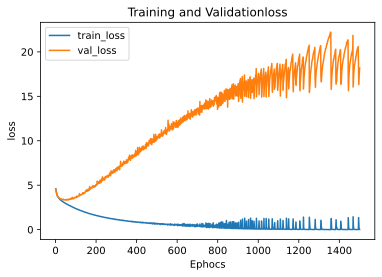

In [148]:
plot_metric(history_CF100_model2,'loss')

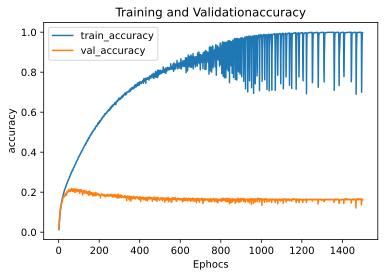

In [149]:
plot_metric(history_CF100_model2,'accuracy')

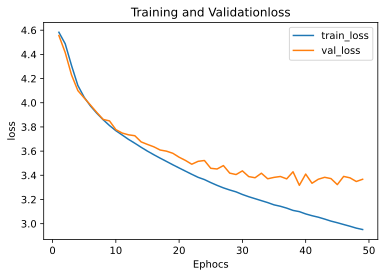

In [150]:
plot_metric(history_CF100_model2_es,'loss')

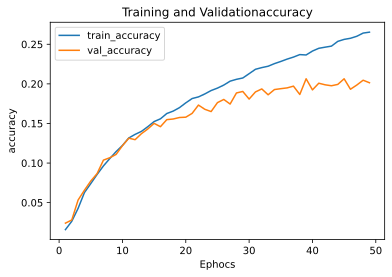

In [151]:
plot_metric(history_CF100_model2_es,'accuracy')

In [153]:
#Evaluating model
_, CF100_train_acc_model2 = history_CF100_model2_es.model.evaluate(CF100_train_images_shape, CF100_train_labels, verbose=0)
_, CF100_test_acc_model2 = history_CF100_model2_es.model.evaluate(CF100_test_images_shape, to_categorical(CF100_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF100_train_acc_model2, CF100_test_acc_model2))

Train: 0.257, Test: 0.205


## Model 3: Auto Encoder

In [46]:
def encoder(ndim):
  encoding_dim = 392
  input_img = keras.Input(shape=(ndim,))
  encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
  decoded = layers.Dense(ndim, activation='sigmoid')(encoded)
  
  autoencoder = keras.Model(input_img, decoded)

  opt = SGD()
  autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
  
  encoder = keras.Model(input_img, encoded)
  encoded_input = keras.Input(shape=(encoding_dim,))
  
  # Retrieve the last layer of the autoencoder model
  decoder_layer = autoencoder.layers[-1]
  # Create the decoder model
  decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

  return autoencoder,encoder,decoder


### Pretrained model

In [47]:
def Dimension_reduction(Xtrain,Xtest,encoder):

  x_train_transformed = encoder.predict(Xtrain)
  x_test_transformed = encoder.predict(Xtest)

  return x_train_transformed, x_test_transformed

In [48]:
def pretrained_model(x_train_transformed,out):
  model_ae = Sequential()
  model_ae.add(Dense(200, activation='relu',input_shape=x_train_transformed.shape[1:]))
  model_ae.add(Dense(100, activation='relu'))
  model_ae.add(Dense(50, activation='relu'))
  model_ae.add(Dense(25, activation='relu'))
  model_ae.add(Dense(out, activation='softmax'))
  
  opt = SGD()
  model_ae.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  
  return model_ae

In [49]:
#Visual of Decoded and original data
def encoder_plot_mnist(X,encoder,decoder):
  n = 10  # How many digits we will display
  encoded_imgs = encoder.predict(X)
  decoded_imgs = decoder.predict(encoded_imgs)

  pyplot.figure(figsize=(20, 4))
  for i in range(n):
    # Display original
    ax = pyplot.subplot(2, n, i + 1)
    pyplot.imshow(X[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + 1 + n)
    pyplot.imshow(decoded_imgs[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
  pyplot.show()

In [50]:
def encoder_plot_cifar(X,encoder,decoder):
  n = 10  # How many digits we will display
  encoded_imgs = encoder.predict(X)
  decoded_imgs = decoder.predict(encoded_imgs)

  pyplot.figure(figsize=(20, 4))
  for i in range(n):
    # Display original
    ax = pyplot.subplot(2, n, i + 1)
    pyplot.imshow(X[i].reshape(32, 32,3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + 1 + n)
    pyplot.imshow(decoded_imgs[i].reshape(32, 32,3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
  pyplot.show()

### **Training the model on MINST Fashion Data**

Autoencoder Training

In [170]:
autoencoder_mnist, encoder_mnist, decoder_mnist=encoder(ndim=784)

In [160]:
history_AE_MF=autoencoder_mnist.fit(MF_train_images_shaped, MF_train_images_shaped,
                epochs=500,
                batch_size=50,
                shuffle=True,
                validation_split=0.20)

Epoch 1/500
960/960 [==============================] - 8s 9ms/step - loss: 0.5552 - val_loss: 0.5375
Epoch 2/500
960/960 [==============================] - 8s 9ms/step - loss: 0.5275 - val_loss: 0.5200
Epoch 3/500
960/960 [==============================] - 9s 9ms/step - loss: 0.5148 - val_loss: 0.5109
Epoch 4/500
960/960 [==============================] - 9s 9ms/step - loss: 0.5070 - val_loss: 0.5041
Epoch 5/500
960/960 [==============================] - 9s 9ms/step - loss: 0.5006 - val_loss: 0.4980
Epoch 6/500
960/960 [==============================] - 8s 9ms/step - loss: 0.4945 - val_loss: 0.4921
Epoch 7/500
960/960 [==============================] - 8s 9ms/step - loss: 0.4885 - val_loss: 0.4861
Epoch 8/500
960/960 [==============================] - 8s 9ms/step - loss: 0.4825 - val_loss: 0.4801
Epoch 9/500
960/960 [==============================] - 8s 9ms/step - loss: 0.4766 - val_loss: 0.4742
Epoch 10/500
960/960 [==============================] - 8s 9ms/step - loss: 0.4707 - val_lo

In [166]:
MF_train_images_shaped.shape

(60000, 784)

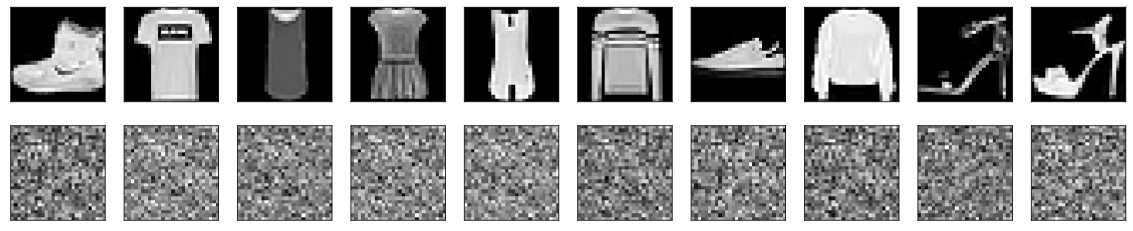

In [181]:
#Visual of Decoded and original data
encoder_plot_mnist(X=MF_train_images_shaped,encoder=encoder_mnist,decoder=decoder_mnist)

Use Pretrained encoder with ANN

In [182]:
#Transform inputs 
MF_train_transformed, MF_test_transformed=Dimension_reduction(Xtrain=MF_train_images_shaped,Xtest=MF_test_images_shaped,encoder=encoder_mnist)

In [183]:
##Training classification model
model_MF=pretrained_model(x_train_transformed=MF_train_transformed,out=10)

In [184]:
history_model3_MF=model_MF.fit(MF_train_transformed,MF_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500)

Epoch 1/500
960/960 - 2s - loss: 1.3071 - accuracy: 0.5541 - val_loss: 0.7616 - val_accuracy: 0.7372
Epoch 2/500
960/960 - 2s - loss: 0.6887 - accuracy: 0.7570 - val_loss: 0.6268 - val_accuracy: 0.7646
Epoch 3/500
960/960 - 2s - loss: 0.5937 - accuracy: 0.7910 - val_loss: 0.5559 - val_accuracy: 0.8067
Epoch 4/500
960/960 - 2s - loss: 0.5398 - accuracy: 0.8098 - val_loss: 0.5108 - val_accuracy: 0.8187
Epoch 5/500
960/960 - 2s - loss: 0.5039 - accuracy: 0.8226 - val_loss: 0.4842 - val_accuracy: 0.8284
Epoch 6/500
960/960 - 2s - loss: 0.4760 - accuracy: 0.8338 - val_loss: 0.4549 - val_accuracy: 0.8400
Epoch 7/500
960/960 - 2s - loss: 0.4567 - accuracy: 0.8372 - val_loss: 0.4722 - val_accuracy: 0.8259
Epoch 8/500
960/960 - 2s - loss: 0.4415 - accuracy: 0.8432 - val_loss: 0.4409 - val_accuracy: 0.8428
Epoch 9/500
960/960 - 2s - loss: 0.4289 - accuracy: 0.8469 - val_loss: 0.4336 - val_accuracy: 0.8457
Epoch 10/500
960/960 - 2s - loss: 0.4172 - accuracy: 0.8498 - val_loss: 0.4227 - val_accura

In [185]:
history_model3_MF_es=model_MF.fit(MF_train_transformed,MF_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500,callbacks=[early_stopping])

Epoch 1/500
960/960 - 2s - loss: 1.5444e-04 - accuracy: 1.0000 - val_loss: 1.2357 - val_accuracy: 0.8742
Epoch 2/500
960/960 - 2s - loss: 1.5371e-04 - accuracy: 1.0000 - val_loss: 1.2376 - val_accuracy: 0.8746
Epoch 3/500
960/960 - 2s - loss: 1.5319e-04 - accuracy: 1.0000 - val_loss: 1.2381 - val_accuracy: 0.8743
Epoch 4/500
960/960 - 2s - loss: 1.5241e-04 - accuracy: 1.0000 - val_loss: 1.2372 - val_accuracy: 0.8742
Epoch 5/500
960/960 - 2s - loss: 1.5192e-04 - accuracy: 1.0000 - val_loss: 1.2385 - val_accuracy: 0.8743
Epoch 6/500
960/960 - 2s - loss: 1.5116e-04 - accuracy: 1.0000 - val_loss: 1.2399 - val_accuracy: 0.8742
Epoch 7/500
960/960 - 2s - loss: 1.5062e-04 - accuracy: 1.0000 - val_loss: 1.2392 - val_accuracy: 0.8745
Epoch 8/500
960/960 - 2s - loss: 1.5020e-04 - accuracy: 1.0000 - val_loss: 1.2399 - val_accuracy: 0.8739
Epoch 9/500
960/960 - 2s - loss: 1.4933e-04 - accuracy: 1.0000 - val_loss: 1.2415 - val_accuracy: 0.8745
Epoch 10/500
960/960 - 2s - loss: 1.4859e-04 - accuracy

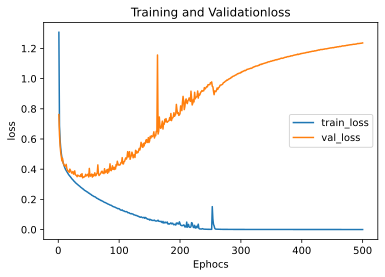

In [186]:
plot_metric(history_model3_MF,'loss')

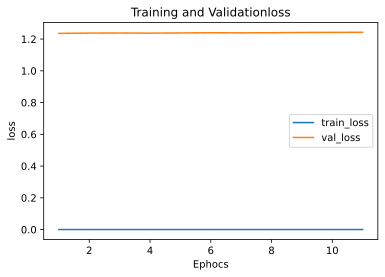

In [187]:
plot_metric(history_model3_MF_es,'loss')

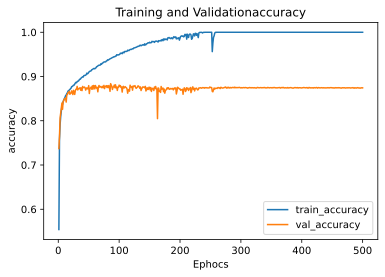

In [188]:
plot_metric(history_model3_MF,'accuracy')

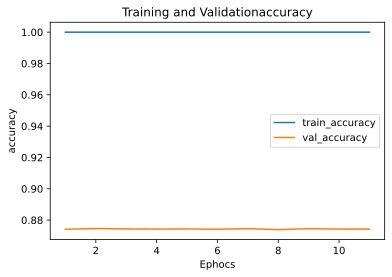

In [189]:
plot_metric(history_model3_MF_es,'accuracy')

In [190]:
_, MF_train_model3= history_model3_MF_es.model.evaluate(MF_train_transformed, MF_train_labels, verbose=0)
_, MF_test_model3 = history_model3_MF_es.model.evaluate(MF_test_transformed, to_categorical(MF_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (MF_train_model3, MF_test_model3))

Train: 0.975, Test: 0.873


### **Training Model on MNIST Digital Data**

Autoencoder training

In [191]:
autoencoder_mnist, encoder_mnist, decoder_mnist=encoder(ndim=784)

In [192]:
history_AE_mnist=autoencoder_mnist.fit(mnist_train_images_shape, mnist_train_images_shape,
                epochs=500,
                batch_size=50,
                shuffle=True,
                validation_split=0.20)

Epoch 1/500
960/960 [==============================] - 8s 9ms/step - loss: 0.6742 - val_loss: 0.6426
Epoch 2/500
960/960 [==============================] - 8s 8ms/step - loss: 0.5925 - val_loss: 0.5320
Epoch 3/500
960/960 [==============================] - 8s 9ms/step - loss: 0.4644 - val_loss: 0.4036
Epoch 4/500
960/960 [==============================] - 8s 9ms/step - loss: 0.3651 - val_loss: 0.3350
Epoch 5/500
960/960 [==============================] - 8s 9ms/step - loss: 0.3202 - val_loss: 0.3067
Epoch 6/500
960/960 [==============================] - 8s 8ms/step - loss: 0.3010 - val_loss: 0.2935
Epoch 7/500
960/960 [==============================] - 8s 9ms/step - loss: 0.2912 - val_loss: 0.2860
Epoch 8/500
960/960 [==============================] - 8s 9ms/step - loss: 0.2852 - val_loss: 0.2811
Epoch 9/500
960/960 [==============================] - 8s 9ms/step - loss: 0.2810 - val_loss: 0.2775
Epoch 10/500
960/960 [==============================] - 8s 9ms/step - loss: 0.2778 - val_lo

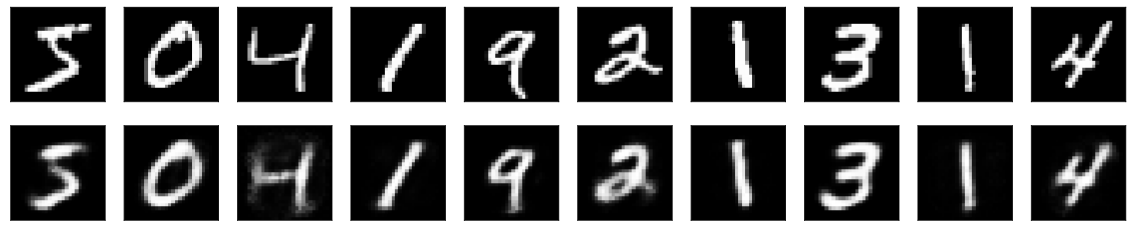

In [193]:
encoder_plot_mnist(X=mnist_train_images_shape,encoder=encoder_mnist,decoder=decoder_mnist)

Using Pretrained Encoder

In [194]:
mnist_train_transformed, mnist_test_transformed=Dimension_reduction(Xtrain=mnist_train_images_shape,Xtest=mnist_test_images_shape,encoder=encoder_mnist)

In [195]:
model_mnist=pretrained_model(x_train_transformed=mnist_train_transformed,out=10)

In [196]:
history_model3_mnist=model_mnist.fit(mnist_train_transformed,mnist_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500)

Epoch 1/500
960/960 - 2s - loss: 0.5967 - accuracy: 0.8245 - val_loss: 0.2966 - val_accuracy: 0.9113
Epoch 2/500
960/960 - 2s - loss: 0.2816 - accuracy: 0.9160 - val_loss: 0.2397 - val_accuracy: 0.9247
Epoch 3/500
960/960 - 2s - loss: 0.2204 - accuracy: 0.9337 - val_loss: 0.1834 - val_accuracy: 0.9449
Epoch 4/500
960/960 - 2s - loss: 0.1850 - accuracy: 0.9438 - val_loss: 0.1659 - val_accuracy: 0.9510
Epoch 5/500
960/960 - 2s - loss: 0.1635 - accuracy: 0.9512 - val_loss: 0.1545 - val_accuracy: 0.9548
Epoch 6/500
960/960 - 2s - loss: 0.1469 - accuracy: 0.9561 - val_loss: 0.1445 - val_accuracy: 0.9538
Epoch 7/500
960/960 - 2s - loss: 0.1333 - accuracy: 0.9593 - val_loss: 0.1219 - val_accuracy: 0.9628
Epoch 8/500
960/960 - 2s - loss: 0.1220 - accuracy: 0.9630 - val_loss: 0.1264 - val_accuracy: 0.9596
Epoch 9/500
960/960 - 2s - loss: 0.1140 - accuracy: 0.9657 - val_loss: 0.1327 - val_accuracy: 0.9607
Epoch 10/500
960/960 - 2s - loss: 0.1044 - accuracy: 0.9682 - val_loss: 0.1100 - val_accura

In [197]:
history_model3_mnist_es=model_mnist.fit(mnist_train_transformed,mnist_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500,callbacks=[early_stopping])

Epoch 1/500
960/960 - 2s - loss: 4.7262e-05 - accuracy: 1.0000 - val_loss: 0.1429 - val_accuracy: 0.9808
Epoch 2/500
960/960 - 2s - loss: 4.7096e-05 - accuracy: 1.0000 - val_loss: 0.1431 - val_accuracy: 0.9808
Epoch 3/500
960/960 - 2s - loss: 4.6976e-05 - accuracy: 1.0000 - val_loss: 0.1433 - val_accuracy: 0.9807
Epoch 4/500
960/960 - 2s - loss: 4.6842e-05 - accuracy: 1.0000 - val_loss: 0.1430 - val_accuracy: 0.9808
Epoch 5/500
960/960 - 2s - loss: 4.6663e-05 - accuracy: 1.0000 - val_loss: 0.1430 - val_accuracy: 0.9807
Epoch 6/500
960/960 - 2s - loss: 4.6627e-05 - accuracy: 1.0000 - val_loss: 0.1433 - val_accuracy: 0.9808
Epoch 7/500
960/960 - 2s - loss: 4.6372e-05 - accuracy: 1.0000 - val_loss: 0.1430 - val_accuracy: 0.9807
Epoch 8/500
960/960 - 2s - loss: 4.6233e-05 - accuracy: 1.0000 - val_loss: 0.1431 - val_accuracy: 0.9808
Epoch 9/500
960/960 - 2s - loss: 4.6274e-05 - accuracy: 1.0000 - val_loss: 0.1433 - val_accuracy: 0.9808
Epoch 10/500
960/960 - 2s - loss: 4.6114e-05 - accuracy

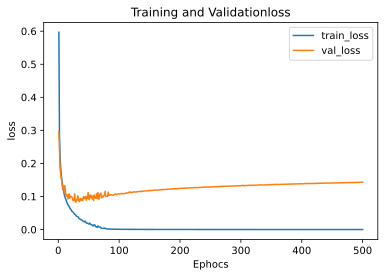

In [198]:
plot_metric(history_model3_mnist,'loss')

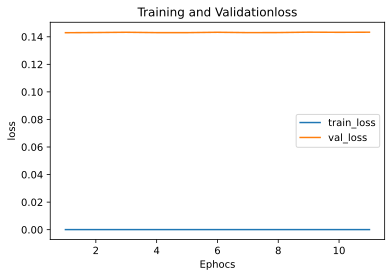

In [199]:
plot_metric(history_model3_mnist_es,'loss')

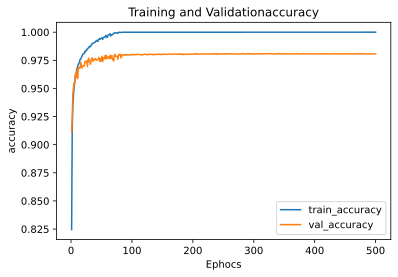

In [200]:
plot_metric(history_model3_mnist,'accuracy')

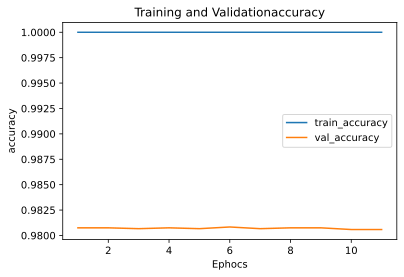

In [201]:
plot_metric(history_model3_mnist_es,'accuracy')

In [202]:
_, mnist_train_model3= history_model3_mnist_es.model.evaluate(mnist_train_transformed, mnist_train_labels, verbose=0)
_, mnist_test_model3 = history_model3_mnist_es.model.evaluate(mnist_test_transformed, to_categorical(mnist_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (mnist_train_model3, mnist_test_model3))

Train: 0.996, Test: 0.980


###**Training Model on CIFAR10 Data**

Autoencoder training

In [51]:
autoencoder_CIFAR, encoder_CIFAR, decoder_CIFAR=encoder(ndim=3072)

In [52]:
history_AE_CIFAR10=autoencoder_CIFAR.fit(CF10_train_images_shape, CF10_train_images_shape,
                epochs=500,
                batch_size=50,
                shuffle=True,
                validation_split=0.20)

Epoch 1/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6965 - val_loss: 0.6946
Epoch 2/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6940 - val_loss: 0.6935
Epoch 3/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6933 - val_loss: 0.6931
Epoch 4/500
800/800 [==============================] - 24s 30ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 5/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 6/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 7/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6924 - val_loss: 0.6924
Epoch 8/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6923 - val_loss: 0.6922
Epoch 9/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6921 - val_loss: 0.6920
Epoch 10/500
800/800 [==============================] - 24s 31ms/step - l

KeyboardInterrupt: ignored

In [ ]:
encoder_plot_cifar(X=CF10_train_images_shape,encoder=encoder_CIFAR,decoder=decoder_CIFAR)

Using Pretrained Encoder

In [ ]:
CF10_train_transformed, CF10_test_transformed=Dimension_reduction(Xtrain=CF10_train_images_shape,Xtest=CF10_test_images_shape,encoder=encoder_CIFAR)

In [ ]:
model_CIFAR10=pretrained_model(x_train_transformed=CF10_train_transformed,out=10)

In [ ]:
history_model3_CF10=model_mnist.fit(CF10_train_transformed,CF10_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500)

In [ ]:
history_model3_CF10_es=model_mnist.fit(CF10_train_transformed,CF10_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500,callbacks=[early_stopping])

In [ ]:
plot_metric(history_model3_CF10,'loss')

In [ ]:
plot_metric(history_model3_CF10_es,'loss')

In [ ]:
plot_metric(history_model3_CF10,'accuracy')

In [ ]:
plot_metric(history_model3_CF10_es,'accuracy')

In [ ]:
_, CF10_train_model3= history_model3_CF10_es.model.evaluate(CF10_train_transformed, CF10_train_labels, verbose=0)
_, CF10_test_model3 = history_model3_CF10_es.model.evaluate(CF10_test_transformed, to_categorical(CF10_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF10_train_model3, CF10_test_model3))

### **Training Model on CIFAR100 Data**

Autoencoder training

In [ ]:
autoencoder_CIFAR, encoder_CIFAR, decoder_CIFAR=encoder(ndim=3072)

In [ ]:
history_AE_CIFAR100=autoencoder_CIFAR.fit(CF100_train_images_shape, CF100_train_images_shape,
                epochs=500,
                batch_size=50,
                shuffle=True,
                validation_split=0.20)

In [ ]:
encoder_plot_cifar(X=CF100_train_images_shape,encoder=encoder_CIFAR,decoder=decoder_CIFAR)

Using Pretrained Encoder

In [ ]:
CF100_train_transformed, CF100_test_transformed=Dimension_reduction(Xtrain=CF100_train_images_shape,Xtest=CF100_test_images_shape,encoder=encoder_CIFAR)

In [ ]:
model_CIFAR100=pretrained_model(x_train_transformed=CF100_train_transformed,out=100)

In [ ]:
history_model3_CF100=model_mnist.fit(CF100_train_transformed,CF100_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500)

In [ ]:
history_model3_CF100_es=model_mnist.fit(CF100_train_transformed,CF100_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500,callbacks=[early_stopping])

In [ ]:
plot_metric(history_model3_CF100,'loss')

In [ ]:
plot_metric(history_model3_CF100_es,'loss')

In [ ]:
plot_metric(history_model3_CF100,'accuracy')

In [ ]:
plot_metric(history_model3_CF100_es,'accuracy')

In [ ]:
_, CF100_train_model3= history_model3_CF100_es.model.evaluate(CF100_train_transformed, CF100_train_labels, verbose=0)
_, CF100_test_model3 = history_model3_CF100_es.model.evaluate(CF100_test_transformed, to_categorical(CF10_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF10_train_model3, CF10_test_model3))

## MODEL 4: CNN

In [ ]:
## CNN model
def CNN_model(input_shape,out):

  model_cnn = models.Sequential()
  model_cnn.add(layers.Conv2D(55, (3, 3), strides=(1,1),padding='same',kernel_initializer='he_normal',activation='relu', input_shape=input_shape))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Conv2D(55, (3, 3),padding='same',activation='relu'))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Conv2D(55, (3, 3),padding='same',activation='relu'))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Flatten())
  model_cnn.add(Dense(200, activation='relu'))
  model_cnn.add(Dense(100, activation='relu'))
  model_cnn.add(Dense(50, activation='relu'))
  model_cnn.add(Dense(25, activation='relu'))
  model_cnn.add(Dense(out, activation='softmax'))

  opt = SGD()
  model_cnn.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  return model_cnn

### Training model on MNIST Fashion

In [ ]:
model_mnist=CNN_model(input_shape=(28,28),out=10)

In [ ]:
history_cnn_MF = model_mnist.fit(MF_train_images,MF_train_labels, epochs=500, 
                    validation_split=0.20,batch_size=50,verbose=2)

In [ ]:
history_cnn_MF_es = model_mnist.fit(MF_train_images,MF_train_labels, epochs=500, 
                    validation_split=0.20,batch_size=50,verbose=2, callbacks=[early_stopping])

In [ ]:
plot_metric(history_cnn_MF,'loss')

In [ ]:
plot_metric(history_cnn_MF_es,'loss')

In [ ]:
plot_metric(history_cnn_MF,'accuracy')

In [ ]:
plot_metric(history_cnn_MF_es,'accuracy')

In [ ]:
_, MF_train_model4= history_cnn_MF_es.model.evaluate(MF_train_transformed, MF_train_labels, verbose=0)
_, MF_test_model4 = history_cnn_MF_es.model.evaluate(MF_test_transformed, to_categorical(MF_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (MF_train_model4, MF_test_model4))

### Training model on MNIST

In [ ]:
model_mnist=CNN_model(input_shape=(28,28),out=10)

In [ ]:
history_cnn_mnist = model_mnist.fit(mnist_train_images,mnist_train_labels, epochs=500, 
                    validation_split=0.20,batch_size=50,verbose=2)

In [ ]:
history_cnn_mnist_es = model_mnist.fit(mnist_train_images,mnist_train_labels, epochs=500, 
                    validation_split=0.20,batch_size=50,verbose=2, callbacks=[early_stopping])

In [ ]:
plot_metric(history_cnn_mnist,'loss')

In [ ]:
plot_metric(history_cnn_mnist_es,'loss')

In [ ]:
plot_metric(history_cnn_mnist,'accuracy')

In [ ]:
plot_metric(history_cnn_mnist_es,'accuracy')

In [ ]:
_, mnist_train_model4= history_cnn_mnist_es.model.evaluate(mnist_train_transformed, mnist_train_labels, verbose=0)
_, mnist_test_model4 = history_cnn_mnist_es.model.evaluate(mnist_test_transformed, to_categorical(mnist_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (mnist_train_model4, mnist_test_model4))

### Training model on CIFAR10

In [ ]:
model_CF10=CNN_model(input_shape=(32,32,3),out=10)

In [ ]:
history_cnn_CF10 = model_CF10.fit(CF10_train_images,CF10_train_labels, epochs=500, 
                    validation_split=0.20,batch_size=50,verbose=2)

In [ ]:
history_cnn_CF10_es = model_CF10.fit(CF10_train_images,CF10_train_labels, epochs=500, 
                    validation_split=0.20,batch_size=50,verbose=2, callbacks=[early_stopping])

In [ ]:
plot_metric(history_cnn_CF10,'loss')

In [ ]:
plot_metric(history_cnn_CF10_es,'loss')

In [ ]:
plot_metric(history_cnn_CF10,'accuracy')

In [ ]:
plot_metric(history_cnn_CF10_es,'accuracy')

In [ ]:
_, CF10_train_model4= history_cnn_CF10_es.model.evaluate(CF10_train_transformed, CF10_train_labels, verbose=0)
_, CF10_test_model4 = history_cnn_CF10_es.model.evaluate(CF10_test_transformed, to_categorical(CF10_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF10_train_model4, CF10_test_model4))

### Training model on CIFAR100

In [ ]:
model_CF100=CNN_model(input_shape=(32,32,3),out=100)

In [ ]:
history_cnn_CF100 = model_CF100.fit(CF100_train_images,CF100_train_labels, epochs=500, 
                    validation_split=0.20,batch_size=50,verbose=2)

In [ ]:
history_cnn_CF100_es = model_CF100.fit(CF100_train_images,CF100_train_labels, epochs=500, 
                    validation_split=0.20,batch_size=50,verbose=2, callbacks=[early_stopping])

In [ ]:
plot_metric(history_cnn_CF100,'loss')

In [ ]:
plot_metric(history_cnn_CF100_es,'loss')

In [ ]:
plot_metric(history_cnn_CF100,'accuracy')

In [ ]:
plot_metric(history_cnn_CF100_es,'accuracy')

In [ ]:
_, CF100_train_model4= history_cnn_CF100_es.model.evaluate(CF100_train_transformed, CF100_train_labels, verbose=0)
_, CF100_test_model4 = history_cnn_CF100_es.model.evaluate(CF100_test_transformed, to_categorical(CF100_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF100_train_model4, CF100_test_model4))